<a href="https://colab.research.google.com/github/Aayush-Borkar/ML-Lab/blob/main/bonus_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load dataset
df = pd.read_csv('data.csv')
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [7]:
# prompt: # Assume the dataset has features in 'X' and target variable in 'y' drop income, Education_Level	Occupation Location	Marital_Status	Employment_Status	Homeownership_Status	Type_of_Housing	Gender	Primary_Mode_of_Transportation clumn in X ande keep only income in y

# Assuming 'X' and 'y' are defined in the previous code
X = df.drop(columns=['Income', 'Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation'])
y = df['Income']


In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Experiment with different values of k
k_values = [3, 5, 7]
mae_scores, mse_scores, rmse_scores = [], [], []

In [11]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Compute metrics
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [12]:
# Compare with Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

print("Linear Regression:")
print(f"MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}")

Linear Regression:
MAE: 1116702.4693914924, MSE: 3150312559062.665, RMSE: 1774911.9862862679


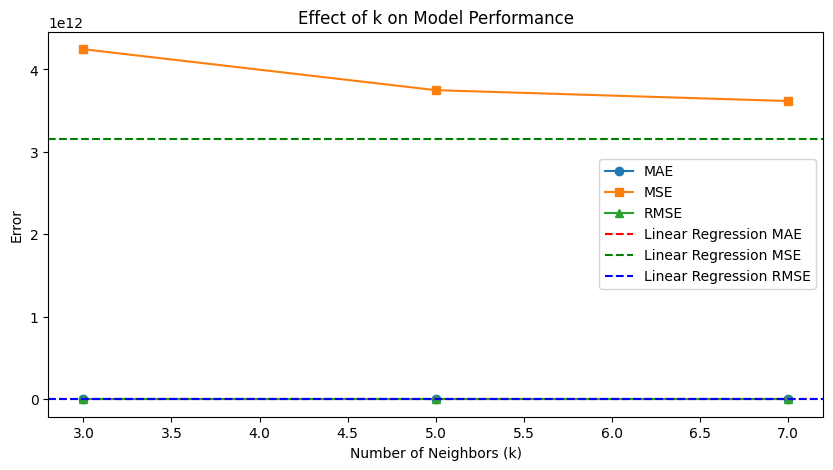

In [13]:
# Visualize k vs Model Performance
plt.figure(figsize=(10, 5))
plt.plot(k_values, mae_scores, marker='o', label='MAE')
plt.plot(k_values, mse_scores, marker='s', label='MSE')
plt.plot(k_values, rmse_scores, marker='^', label='RMSE')
plt.axhline(y=lr_mae, color='r', linestyle='--', label='Linear Regression MAE')
plt.axhline(y=lr_mse, color='g', linestyle='--', label='Linear Regression MSE')
plt.axhline(y=lr_rmse, color='b', linestyle='--', label='Linear Regression RMSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Effect of k on Model Performance')
plt.legend()
plt.show()